## EDA and Feature Engineering on Google Playstore Dataset

In [117]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [118]:
#Loading the dataset
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Basic info of dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Statistical description of dataset

In [120]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Features in dataset

In [121]:
df.keys()

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [122]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Shape of dataset

In [123]:
df.shape

(10841, 13)

---
Insights - Dataset have 13 features and 10841 rows

---

## Missing values and its Handling

In [124]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

---
Insights - Total 1474 data are missing in rating columns , 1 data of type , 1 data of content rating, 8 data of current version , and 3 data of android version are missing

---

<Axes: >

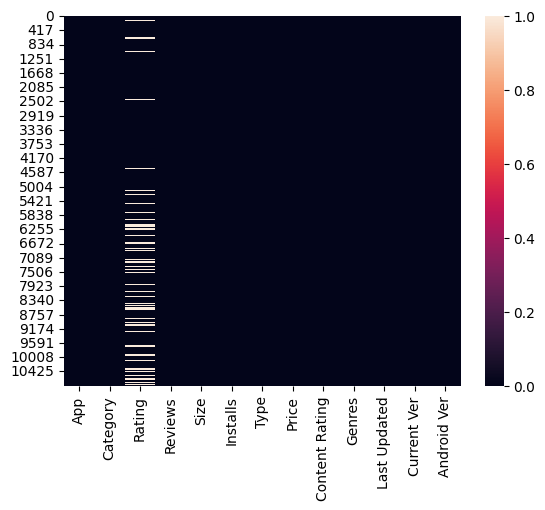

In [125]:
## Visualize missing value

sns.heatmap(df.isnull())

In [126]:
#Handling missing value in Rating feature

df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Rating'].isnull().sum()
df['Rating']

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64

In [127]:
#Handling missing value in Type feature
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])
df['Type'].isnull().sum()
df['Type']

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10841, dtype: object

In [128]:
###Handling missing value in Content Rating feature
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])
df['Content Rating'].isnull().sum()

0

In [129]:
###Handling missing value in Current ver feature
df['Current Ver'] = df['Current Ver'].fillna('1.0.0')
df['Current Ver'].isnull().sum()

0

In [130]:
###Handling missing value in Android ver feature
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])
df['Android Ver'].isnull().sum()

0

In [131]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

---


Insight - Now dataset has 0 misisng value


---

## Cleaning Reviews Column
i.e. Converting 1.2M to 1.2

In [132]:
df['Reviews'].dtype

dtype('O')

In [133]:
# shape of data set with numeric value
df['Reviews'].str.isnumeric().sum()

10840

In [134]:
108401 - 108400

1

Total 1 value is aplha numeric

In [135]:
# Alpha numeric value data
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [136]:
df.loc[10472,'Reviews'] = 3.0

In [137]:
## Now Convert the Review feature frim object to int
df['Reviews'] = df['Reviews'].astype('int')

In [138]:
df['Reviews'].dtype

dtype('int32')

## Cleaning Size Column

In [139]:
#checking size
df['Size'].shape

(10841,)

In [140]:
#checking datatype
df['Size'].dtype

dtype('O')

In [141]:
#unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [142]:
## Handling with Aplha numeric value
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].str.replace('+' ,'')
df['Size']=df['Size'].str.replace(',' ,'')
df['Size']=df['Size'].replace('Varies with device',np.nan)


In [143]:
#changing Size column datatype
df['Size']=df['Size'].astype(float)

In [144]:
df['Size'].dtype

dtype('float64')

## Cleaning Installs feature

In [145]:
df['Installs'].dtype

dtype('O')

In [146]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [147]:
# Now converting aplha numeric value to Numeric value

df['Installs']=df['Installs'].str.replace('+' ,'')
df['Installs']=df['Installs'].str.replace(',' ,'')
df['Installs']=df['Installs'].str.replace('Free' ,'0')


In [148]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [149]:
#changing Size column datatype
df['Installs']=df['Installs'].astype(float)

In [150]:
df['Installs'].dtype

dtype('float64')

## Cleaning Price feature

In [151]:
df['Price'].dtype

dtype('O')

In [152]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [153]:
# Remove $ sign
df['Price']=df['Price'].str.replace('$' ,'')
df['Price']=df['Price'].str.replace('Everyone' ,'0')


In [154]:
df['Price'] = df['Price'].astype(float)

In [155]:
df['Price'].dtype

dtype('float64')

## Cleaning Last Update column

In [158]:
df['Last Updated'].dtype

dtype('O')

In [170]:
df.loc[10472,'Last Updated'] = "January 1, 2019"

In [171]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

#Create three new column
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

In [173]:
#Now drop ['Last Updated']
df = df.drop('Last Updated' , axis=1)

In [175]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

## Segregate Numerical and Categorical Feature

In [178]:
columns = df.columns
num_col = []
cat_col = []

for i in columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

print("Categorical columns are : " , cat_col)
print("Numerical columns are : " , num_col)

Categorical columns are :  ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
Numerical columns are :  ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']


## Data Visualization

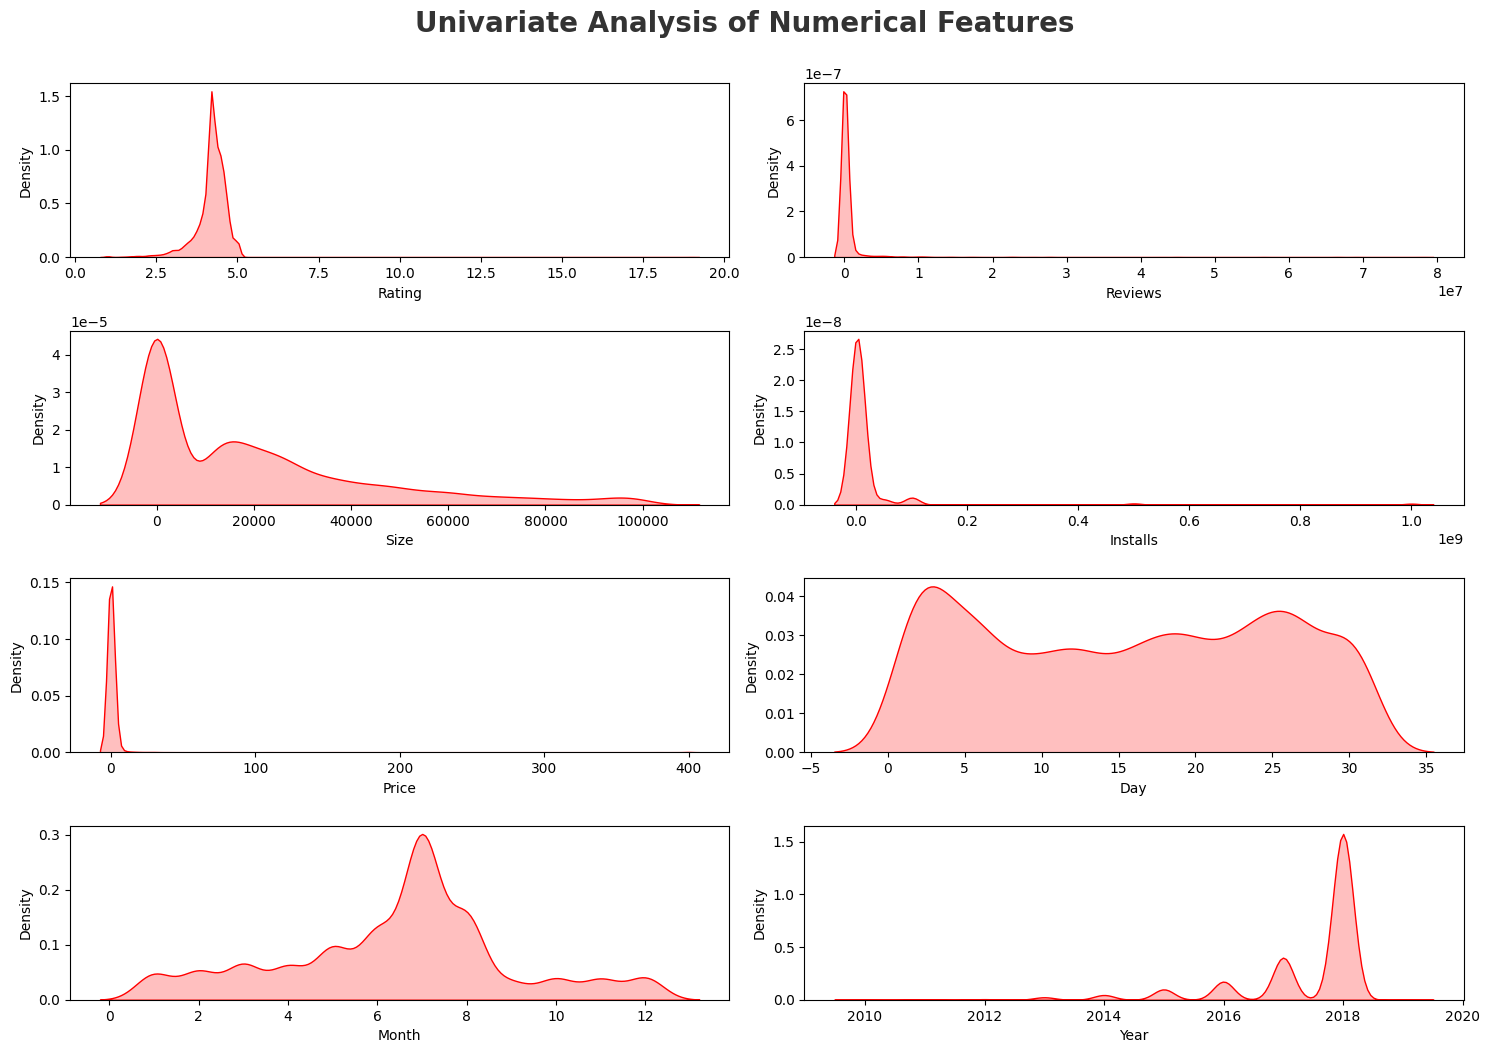

In [192]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='r')
    plt.xlabel(num_col[i])
    plt.tight_layout()   #for add padding between and around subplot
    

---
## Insights
In year 2018 , maximum app are installed
Price of Maximum App is zero i.e. Maximum app is free to use

---